In [1]:
# Imports
%matplotlib inline
from __future__ import division
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = (9.0, 5.0)
import numpy as np
from IPython.html.widgets import interactive
from IPython.display import display
from scipy import signal

/Users/bob/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


### Sampling
Let's explore the phenomenon of aliasing.  

### Step 1: Create Signal
Define a signal that is extremely oversampled:

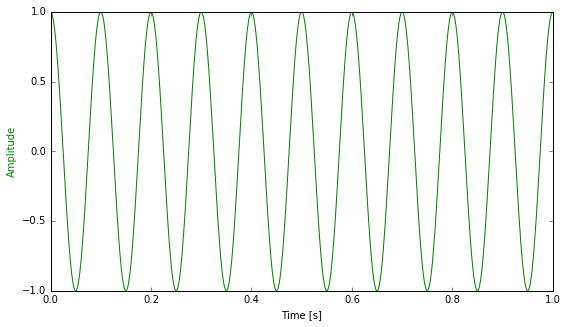

In [2]:
f_c = 10
sample_rate = 1000.0

# create time samples
t = np.arange(0,100,1.0/sample_rate)

# create signal values
x = np.cos(2*np.pi*f_c*t)


# plot time domain
plt.figure(1)
plt.plot(t, x, 'g');
plt.ylabel('Amplitude', color='g');
plt.xlabel('Time [s]');
plt.xlim([0,1]);


### Step 2: Subsample
Now, let's overlay a subsampled discrete time version of this signal.  The carrier is 10Hz, which mean the Nyquist rate is 20Hz.  If we sample at a rate less than 20Hz, then there will be aliasing.  To explore this, start by sampling at 15Hz.

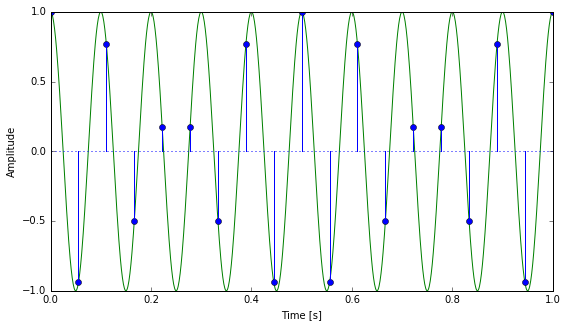

In [3]:
sub_sample_rate = 18.0

# create time samples
t_sub_sample = np.arange(0,100,1.0/sub_sample_rate)

# create signal values
x_sub_sample = np.cos(2*np.pi*f_c*t_sub_sample)


# plot time domain
plt.figure(1)
plt.plot(t, x, 'g');
plt.stem(t_sub_sample, x_sub_sample, 'b', basefmt=':');
plt.ylabel('Amplitude');
plt.xlabel('Time [s]');
plt.xlim([0,1]);


### Step 3: Aliasing
Nyquist tells us that this discrete-time signal is a subsampled version of the continous time signal.  The implication is that the original signal cannot be perfectly recovered. Instead, when we try to recover the continous time signal from this sampled version, we get a different sinusoid.  The question is: which one?

#### Math
The continous-time signal is $x(t) = \cos(2\pi 10 t)$.  When we sample at 18Hz, we are left with 
\begin{eqnarray}
x[n] &=& \cos(2\pi 10 n/18) \\&=& \cos(10 \pi n /9) \\&=& \cos(10 \pi n /9 - 2\pi n) \\&=& \cos(-8 \pi n /9) \\&=& \cos(8 \pi n /9).
\end{eqnarray}

To convert to continous time, "apply" an ideal DAC, we can substitute $n=18 t$, and are left with
\begin{eqnarray}
x[n] &=& \cos(8 \pi 18 t /9) \\&=& \cos(2\pi 8 t).
\end{eqnarray}


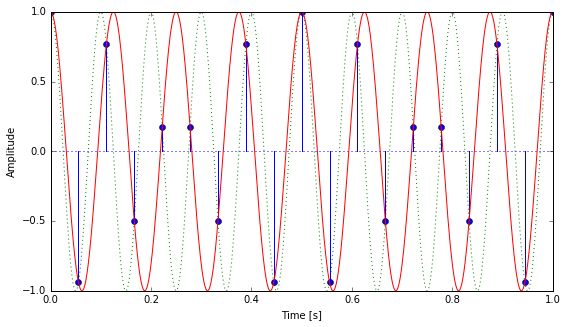

In [4]:
f_c_alias = 8
sample_rate = 1000.0

# create time samples
t = np.arange(0,100,1.0/sample_rate)

# create signal values
x_alias = np.cos(2*np.pi*f_c_alias*t)


# plot time domain
plt.figure(1)
plt.plot(t, x, 'g:');
plt.stem(t_sub_sample, x_sub_sample, 'b', basefmt=':');
plt.plot(t, x_alias, 'r');
plt.ylabel('Amplitude');
plt.xlabel('Time [s]');
plt.xlim([0,1]);

### Step 4: Example 2
The continous-time signal is still $x(t) = \cos(2\pi 10 t)$.  

Now let's try to subsample even more.  For example, let's sample at 6Hz:
\begin{eqnarray}
x[n] &=& \cos(2\pi 10 n/6) \\&=& \cos(10 \pi n /3) \\&=& \cos(10 \pi n /3 - 2\pi n) \\&=& \cos(1 \pi n /3 + 3\pi n).
\end{eqnarray}

If we subtract $4\pi n$ from the argument, we are left the same signal.
\begin{eqnarray}
x[n] &=& \cos(1 \pi n /3 + 3\pi n - 4\pi n) \\&=& \cos(-2 \pi n /3) \\&=& \cos(2 \pi n /3).
\end{eqnarray}

To convert to continous time, "apply" an ideal DAC, we can substitute $n=18 t$, and are left with
\begin{eqnarray}
x[n] &=& \cos(2 \pi 6 t /3) \\&=& \cos(2\pi 2 t).
\end{eqnarray}

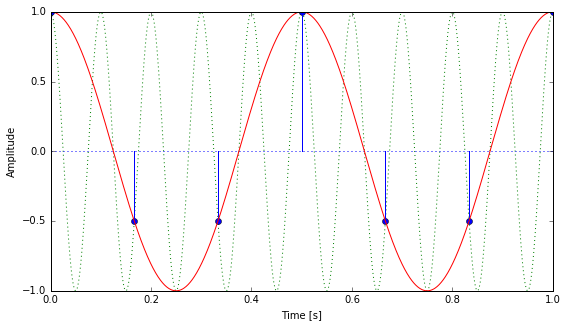

In [5]:
f_c_alias = 2
f_c = 10
sample_rate = 1000.0

# create time samples
t = np.arange(0,100,1.0/sample_rate)

# create signal values
x = np.cos(2*np.pi*f_c*t)

# create signal values
x_alias = np.cos(2*np.pi*f_c_alias*t)

sub_sample_rate = 6.0

# create time samples
t_sub_sample = np.arange(0,100,1.0/sub_sample_rate)

# create signal values
x_sub_sample = np.cos(2*np.pi*f_c*t_sub_sample)

# plot time domain
plt.figure(1)
plt.plot(t, x, 'g:');
plt.stem(t_sub_sample, x_sub_sample, 'b', basefmt=':');
plt.plot(t, x_alias, 'r');
plt.ylabel('Amplitude');
plt.xlabel('Time [s]');
plt.xlim([0,1]);

### Step 5: Discrete-Time Spectrum

The discrete time spectrum is indexed by $\hat{\omega} \in (-\pi, \pi]$.  For a signal that is a sinusoid, it will have the form $x[n] = \cos(\hat{\omega} n)$.  The value of $\hat{\omega}$ is where the discrete time spectrum will have a spectral line.  Going off of the previous example, $x[n] = \cos\left(\frac{2}{3}\pi n\right)$; that is $\hat{\omega} = \frac{2}{3}\pi$.

To compute this spectrum, we simply take the DFT (FFT) of the discrete-time signal.  In the previous notebook, we were actually "faking" the continuous-time spectrum to some extent.  


#### Side Note
When solving aliasing problems, it is a handy rule of thumb to remember that $\hat{\omega} \in (-\pi, \pi]$.  For example, if you are trying to compute the discrete time signal $x[n] = \cos(\hat{\omega} n)$, and $\hat{\omega} \notin (-\pi, \pi]$, then you have simplified the argument of $\cos()$ enough.



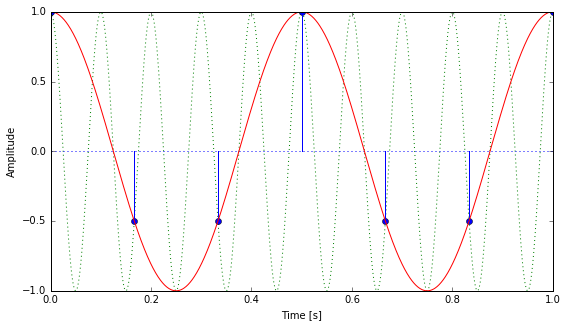

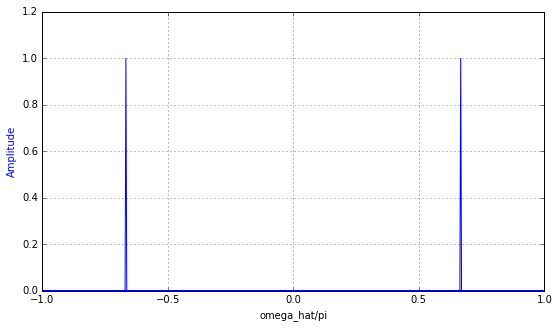

In [6]:
f_c_alias = 2
f_c = 10
sample_rate = 1000.0

# create time samples
t = np.arange(0,100,1.0/sample_rate)

# create signal values
x = np.cos(2*np.pi*f_c*t)

# create signal values
x_alias = np.cos(2*np.pi*f_c_alias*t)

sub_sample_rate = 6.0

# create time samples
t_sub_sample = np.arange(0,100,1.0/sub_sample_rate)

# create signal values
x_sub_sample = np.cos(2*np.pi*f_c*t_sub_sample)

# plot time domain
plt.figure(1)
plt.plot(t, x, 'g:');
plt.stem(t_sub_sample, x_sub_sample, 'b', basefmt=':');
plt.plot(t, x_alias, 'r');
plt.ylabel('Amplitude');
plt.xlabel('Time [s]');
plt.xlim([0,1]);


total_signal_power = sum(abs(x_sub_sample)**2)

# Calculate DFT
spectrum = np.fft.fft(x_sub_sample)

# DFT frequencies
freq = np.fft.fftfreq(x_sub_sample.size)

plt.figure(2)
plt.plot(freq*2, abs(spectrum/total_signal_power), 'b');
plt.ylabel('Amplitude', color='b');
plt.xlabel('omega_hat/pi');
plt.ylim([0,1.2]);
plt.grid(True);

### Step 6: Compute Alias Frequency

The alias frequency is $f_a = |f_s n - f_c|$, where $n$ is the integer that minimizes $f_a$.  We can calculate this integer by $n = round(f_c/f_s)$.  Using these two formulas, we can create a function that returns the alias frequency.

In [7]:
def alias_frequency(f_s,f_c):
    n = round(f_c/f_s)
    return abs(f_s*n-f_c)

# test values
print "alias_frequency(18,10) =",alias_frequency(18,10)
print "alias_frequency(6,10) =",alias_frequency(6,10)

alias_frequency(18,10) = 8.0
alias_frequency(6,10) = 2.0


### Step 7: Interactive Alias Demo
Using the bits of code from this and previous excercises, create an interactive element that allows you to explore the effect of aliasing.  Specifically, create sliders for:

#### Input
- sample frequency
- carrier frequency

#### Output
The output should be a time plot and a spectrum plot.  The time plot should contain:
- the original "continous-time" signal (use a sample rate of 1000Hz to approximate continous time)
- a stem plot of the samples of the discrete-time signal sampled at _sample frequency_
- a plot of the continuous version of the discrete-time signal after it is passed through an ideal ADC

You will probably need to utilize the `alias_frequency` function to accomplish this task.

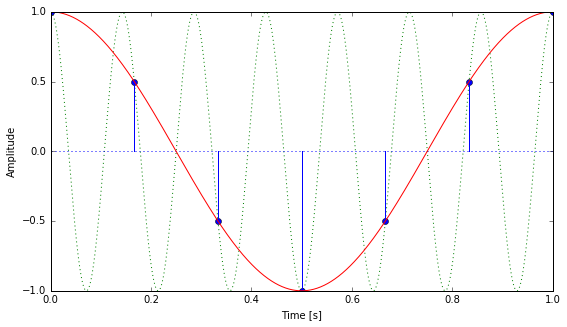

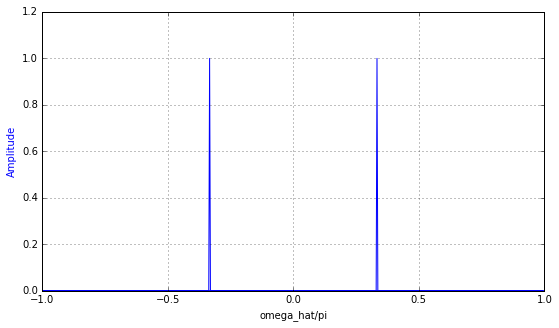

In [8]:
##########  Insert Code in this cell  ###########
def plot_alias_demo(f_c=10,sub_sample_rate=6.0):  # add arguments and default values
    
    # define "continuous-time" sample rate
    sample_rate = 1000.0
#     f_c = 10
    # create time samples
    t = np.arange(0,100,1.0/sample_rate)
    # create signal values
    x = np.cos(2*np.pi*f_c*t)
    f_c_alias = alias_frequency(sub_sample_rate,f_c)
    # create signal values
    x_alias = np.cos(2*np.pi*f_c_alias*t)
#     sub_sample_rate = 6.0

    # create time samples
    t_sub_sample = np.arange(0,100,1.0/sub_sample_rate)

    # create signal values
    x_sub_sample = np.cos(2*np.pi*f_c*t_sub_sample)

    # plot time domain
    plt.figure(1)
    plt.plot(t, x, 'g:');
    plt.stem(t_sub_sample, x_sub_sample, 'b', basefmt=':');
    plt.plot(t, x_alias, 'r');
    plt.ylabel('Amplitude');
    plt.xlabel('Time [s]');
    plt.xlim([0,1]);


    total_signal_power = sum(abs(x_sub_sample)**2)

    # Calculate DFT
    spectrum = np.fft.fft(x_sub_sample)

    # DFT frequencies
    freq = np.fft.fftfreq(x_sub_sample.size)

    plt.figure(2)
    plt.plot(freq*2, abs(spectrum/total_signal_power), 'b');
    plt.ylabel('Amplitude', color='b');
    plt.xlabel('omega_hat/pi');
    plt.ylim([0,1.2]);
    plt.grid(True);


interactive(plot_alias_demo,f_c=(1,10),sub_sample_rate=(2,16.0))  # add arguments and ranges